## 1. Введение

### 1.1. Описание проекта, ретроспектива

Отдел маркетинга “Метанпромбанка” предоставил данные клиентской базы с целью получить рекомендации по снижению оттока.

Ранее было проведено исследование оттока, составлены дэшборды и выделены сегменты, но клиентская база поменялась, и текущие
решения не работают.

### 1.2. Цель проекта

 - Выделить сегменты оттока клиентов, сформировать рекомендации по каждому сегменту.

### 1.3. Задачи проекта
 - Провести исследовательский анализ для формирования портрета клиента оттока
 - Провести корреляционный анализ для определения влияющих факторов на отток
 - Провести статистический анализ для проверки гипотез 
 - На основании предыдущих пунктов свормировать сегменты оттока, проранжировать их
 - Сформулировать рекомендации по каждому сегменту

### 1.4. Структура данных

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. <br />
База данных "bank_scrooge.csv":
 - Userid — идентификатор пользователя,
 - Score — баллы кредитного скоринга,
 - City — город,
 - Gender — пол,
 - Age — возраст,
 - Equity — количество баллов собственности,
 - Balance — баланс на счёте,
 - Products — количество продуктов, которыми пользуется клиент,
 - CreditCard — есть ли кредитная карта,
 - Last_activity — активный клиент,
 - Estimated_salary — заработная плата клиента,
 - Churn — ушёл или нет.

## 2. Загрузка и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
from scipy import stats as st
from scipy.stats import skew, mode
import phik
import os

In [2]:
path1 = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
path2 = 'bank_scrooge.csv'

In [3]:
df = pd.read_csv(path1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [5]:
df.head(3)

USERID  score     city gender   age  equity    balance  products  \
0  183012  850.0  Рыбинск      Ж  25.0       1   59214.82         2   
1  146556  861.0  Рыбинск      Ж  37.0       5  850594.33         3   
2  120722  892.0  Рыбинск      Ж  30.0       0        NaN         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0

In [6]:
#приведем названия столбйцов к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
#проверим наличие явных дубликатов
df.duplicated().mean()

0.0

In [8]:
#проверим наличие явных дубликатов среди id пользователей
df['userid'].duplicated().mean()

0.0073

In [9]:
duplicated_row = df[df.duplicated(['userid'], keep=False)]
duplicated_row.groupby('city').agg({'userid':'count','age':'median','balance':'median', 'est_salary':'median'})

userid   age     balance  est_salary
city                                           
Рыбинск        73  40.0  485750.165   118465.34
Ярославль      73  38.0  819182.010   148806.88

In [10]:
duplicated_row.sort_values(by='userid')

userid  score       city gender   age  equity      balance  products  \
1893  116540  883.0    Рыбинск      Ж  55.0       1    362756.49         3   
7694  116540  887.0  Ярославль      Ж  38.0       0          NaN         1   
7542  117943  880.0  Ярославль      Ж  40.0       0          NaN         1   
4866  117943  855.0    Рыбинск      Ж  32.0       6   1036832.93         4   
5896  120258  905.0  Ярославль      М  30.0       0          NaN         1   
...      ...    ...        ...    ...   ...     ...          ...       ...   
2597  226719  990.0  Ярославль      М  37.0       4  14648692.14         2   
8205  227795  840.0    Рыбинск      М  34.0       2    350768.03         1   
8497  227795  839.0  Ярославль      М  34.0       2    326593.14         2   
6457  228075  839.0    Рыбинск      М  39.0       5    507199.85         3   
1247  228075  932.0  Ярославль      М   NaN       5   7601719.20         2   

      credit_card  last_activity  est_salary  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0  
7542            1              0   137718.93      0  
4866            1              1   107792.71      1  
5896            1              1   146427.96      0  
...           ...            ...         ...    ...  
2597            0              0   934412.61      1  
8205            1              0   102036.14      1  
8497            1              0   103314.92      0  
6457            0              1    85195.80      0  
1247            1              1   408121.16      0  

[146 rows x 12 columns]

По всей видимости, дубликаты id - это технический сбой баз данных Ярославского или Рыбинского отделения. Под дубликатами id записаны совершенно разные люди, поэтому считать из за полноценные дубликаты нельзя.

In [11]:
#промерим наличие неявных дубликатов в столбце city
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [12]:
#проверим наличие пропусков
df.isna().sum()

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [13]:
#Прежде чем принимать решение об обработке пропусков age, рассмотрим строки с пропусками в age подробнее
df[df['age'].isna() == True]

userid  score       city gender  age  equity     balance  products  \
1247  228075  932.0  Ярославль      М  NaN       5  7601719.20         2   
2165  187635  692.0    Рыбинск      Ж  NaN       0         NaN         1   
2444  221156  913.0  Ярославль      М  NaN       0         NaN         1   
3091  138660  836.0     Ростов      Ж  NaN       5   294315.53         2   
4912  210674  834.0    Рыбинск      М  NaN       1   238330.52         2   
5470  218868  827.0    Рыбинск      Ж  NaN       4   448959.07         2   
5495  151662  884.0    Рыбинск      Ж  NaN       0         NaN         1   
7236  210135  908.0    Рыбинск      Ж  NaN       4  1120340.31         3   
7248  219343  920.0    Рыбинск      Ж  NaN       0         NaN         1   
7345  184913  829.0  Ярославль      Ж  NaN       3   188648.77         2   
7409  214031  777.0  Ярославль      М  NaN       2   171510.23         1   
8015  198635  670.0  Ярославль      Ж  NaN       0         NaN         1   
8070  226550  940.0    Рыбинск      М  NaN       0         NaN         1   
8293  216848  930.0  Ярославль      М  NaN       0         NaN         1   
8385  206759  915.0    Рыбинск      М  NaN       0         NaN         1   
8449  210898  805.0  Ярославль      Ж  NaN       0         NaN         1   
8632  221197  893.0  Ярославль      М  NaN       0         NaN         1   
8785  127440  663.0  Ярославль      М  NaN       0         NaN         1   
9104  222480  776.0    Рыбинск      Ж  NaN       5   796735.09         1   
9301  202983  942.0    Рыбинск      Ж  NaN       0         NaN         1   
9380  187459  894.0    Рыбинск      М  NaN       0         NaN         1   
9457  141945  929.0  Ярославль      М  NaN       0         NaN         1   
9632  185829  927.0  Ярославль      М  NaN       0         NaN         1   
9634  221809  917.0  Ярославль      М  NaN       0         NaN         1   
9667  163657  849.0  Ярославль      М  NaN       4  1254013.85         2   
9819  140934  832.0    Рыбинск      Ж  NaN       3   385763.16         2   

      credit_card  last_activity  est_salary  churn  
1247            1              1   408121.16      0  
2165            1              1   160368.82      0  
2444            1              1   135693.24      0  
3091            0              1    63310.22      1  
4912            0              1    93775.06      0  
5470            1              1    67835.95      0  
5495            1              1   137500.77      0  
7236            1              1    85002.15      0  
7248            1              0   159248.67      0  
7345            0              1    75206.90      0  
7409            1              1    75409.63      0  
8015            1              1   168699.33      0  
8070            0              1   147696.95      0  
8293            1              1   199542.51      0  
8385            1              0    71179.53      0  
8449            0              1   922080.25      0  
8632            1              0   173929.92      0  
8785            1              1   117197.56      0  
9104            1              1    55073.63      0  
9301            1              1   163804.73      0  
9380            1              0   178012.28      0  
9457            1              0   381868.89      0  
9632            1              0   231254.86      0  
9634            1              1   192644.15      0  
9667            1              1   119106.67      0  
9819            0              1    59651.35      0

In [14]:
#Пропуски в столбце age можно отнести к категории MCAR, их очень мало и заполнение медианной не повлияет на результат.
df['age'] = df['age'].fillna(df['age'].median())

In [15]:
#Прежде чем принимать решение об обработке пропусков balance, рассмотрим строки с пропусками в balance подробнее
df[df['balance'].isna() == True].groupby('city')[['est_salary', 'age', 'score']].agg(['min', 'max', 'median'])

est_salary                          age               score         \
                 min         max     median   min   max median    min    max   
city                                                                           
Ростов      20722.49   506570.67  137711.36  19.0  77.0   42.0  642.0  981.0   
Рыбинск     25063.96   912105.84  162521.35  18.0  83.0   41.0  642.0  990.0   
Ярославль   20274.03  1333687.36  181818.22  18.0  86.0   39.0  646.0  986.0   

                  
          median  
city              
Ростов     903.0  
Рыбинск    899.0  
Ярославль  903.0

Пропуски в столбце balance следует отнести к категории MNAR (Отсутствует не случайно), поэтому их нельзя удалять или заполнять.

In [16]:
#Приведем значения age и score к целочисленному типу
df = df.astype({'age':'Int64', 'score':'Int64'})

**Промежуточный вывод**:

В результате обработки данных были проверены:
- пропуски данных, и принято решение об их обработке в зависимости от характера пропуска;
- явные и неявные дубликаты, и обработаны с зависимости от характера дубликата;
- переменные приведены к более удобному типу.

В данных было обнаружено большое количество пропусков (22%) в столбце balance. По характеру пропусков, их можно категоризовать как MNAR. Пропуски в balance есть во всех трех городах, среди клиентов разного заработка, возраста и оценки скоринга. Какой-то определенной зависимости у данных пропусков не отслеживается. В связи с этим, можно предположить, что наличие пропусков является следствием технической ошибки (при хранении, обработки или передачи данных).

## Исследовательский анализ

In [17]:
fig = px.box(df, x='score')
  
fig.update_layout(
    title='Распределение оценки скоринга клиентов',
    xaxis_title='Оценка скоринга',
    yaxis_title=' ',)

fig.show()

In [18]:
#очистим данные от выбросов
df = df[df['score']>654]

In [19]:
#Рассмотрим параметр score в разрезе оттока
fig = px.histogram(df, x='score', histnorm='probability', barmode ='overlay', color='churn')

fig.update_layout(
    title='Распределение оценки скоринга',
    xaxis_title='Оценка скоринга',
    yaxis_title='Вероятность оценки',
    legend_title="Принадлежность к оттоку")


series_names = ["ушли", "остались"]

for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name
    
fig.show()

В переменной score аномальных значений и выбросов не наблюдается.
У большей части клиентов, которые ушли, оценка скоринга в интервале от 830-940.

In [20]:
#Рассмотрим параметр city
fig = px.histogram(df, x='city',  color='churn', histnorm='probability',barmode ='overlay', text_auto=True)

fig.update_layout(
    title='Распределение клиентов банка по городам',
    xaxis_title='Города',
    yaxis_title='Вероятность проживания в городе',
    legend_title="Принадлежность к оттоку")

series_names = ["ушли", "остались"]

for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name

fig.show()

In [21]:
df.groupby('churn')['city'].agg(pd.Series.mode)

churn
0    Ярославль
1    Ярославль
Name: city, dtype: object

На столицу области приходится большее число клиентов. Так же на Ярославль приходится бОльшее число клиентов оттока и оставшихся клиентов.

In [22]:
#закодируем переменную city
a = pd.get_dummies(df['city'])
df = df.merge(a, how='inner', left_index = True, right_index = True)

In [23]:
#Рассмотрим параметр пола в разрезе
fig = px.histogram(df, x="gender", color='churn', histnorm='probability', barmode ='overlay', text_auto=True)
fig.update_layout(
    title='Распределение пола в разрезе оттока',
    yaxis_title='Вероятность пола',
    xaxis_title='Возраст',
    legend_title="Принадлежность к оттоку")

series_names = ["ушли", "остались"]

for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name

fig.show()

Мужчины подвержены оттоку больше, чем женщины. 

In [24]:
#Параметр возраста
fig = px.box(df, x='age')
  
fig.update_layout(
    title='Распределение возраста клиентов',
    xaxis_title='Возраст',
    yaxis_title=' ',)

fig.show()

In [25]:
#очистим данные от выбросов
df = df[df['age']<80]

In [26]:
#Рассмотрим параметр возраста в разрезе оттока
fig = px.histogram(df, x="age", color='churn', histnorm='probability', barmode ='overlay')
fig.update_layout(
    title='Распределение возраста среди клиентов в разрезе оттока',
    yaxis_title='Вероятность возраста',
    xaxis_title='Возраст',
    legend_title="Принадлежность к оттоку")

series_names = ["ушли", "остались"]

for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name

fig.show()

Теперь можно заметить, что более подвержены к оттоку клиенты в возрасте 25-35 и 50-60 лет.

In [27]:
#рассмотрим переменную equity в разрезе оттока
fig = px.histogram(df, x='equity',  histnorm='probability', color='churn', barmode ='overlay')
  
fig.update_layout(
    title='Распределение оценки собственности',
    xaxis_title='Баланс клиента',
    yaxis_title='Вероятность оценки',
    legend_title="Принадлежность к оттоку")

series_names = ["ушли", "остались"]

for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name
fig.show()

У клиентов оттока вероятнее всего оценка собственности составляет 3-8 баллов

In [28]:
#рассмотрим переменную balance 
fig = px.box(df, x='balance')
  
fig.update_layout(
    title='Распределение баланса клиентов',
    xaxis_title='Баланс клиента',
    yaxis_title=' ',)

fig.show()

In [29]:
#Посчитаем 95-й и 99-й перцентили количества заказов на пользователя
df_balance = df.dropna(subset=['balance'])
print(np.percentile(df_balance['balance'], [95, 99])) 

[2119157.885 4828710.194]


Значение 99го прецентиля почти в 2 раза превышает значение 95го прецентиля. Примем 2.1млн - как предельный уровень баланса, остальное будет считать выбросом.

In [30]:
#очистим данные от выбросов
df = df[df['balance']<2119157.885]

In [31]:
#рассмотрим переменную balance в разрезе оттока
fig = px.histogram(df, x='balance',  histnorm='probability', color='churn', barmode ='overlay')
  
fig.update_layout(
    title='Распределение баланса клиентов',
    xaxis_title='Баланс клиента',
    yaxis_title='Вероятность баланса',
    legend_title="Принадлежность к оттоку")

series_names = ["ушли", "остались"]

for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name
fig.show()

Высокая вероятность, что у клиентов оттока баланс выше 700 тысяч руб.

In [32]:
#Рассмотрим параметр products
fig = px.histogram(df, x='products', barmode ='overlay', histnorm='probability', color='churn', text_auto=True)

fig.update_layout(
    title='График количества продуктов у клиентов',
    xaxis_title='Количество продуктов',
    yaxis_title='Вероятность кличества продуктов',
    legend_title="Принадлежность к оттоку")

series_names = ["ушли", "остались"]

for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name

fig.show()

У клиентов из оттока высокая вроятность владеть 3-5 продуктами.

In [33]:
#Рассмотрим параметр credit_card
fig = px.histogram(df, x='credit_card', barmode ='overlay', histnorm='probability', color='churn', text_auto=True)

fig.update_layout(
    title='График наличия кредитной карты у клиентов',
    yaxis_title='Вероятность наличия кредитной карты',
    xaxis_title='Наличие кредитной карты (нет/да)',
    legend_title="Принадлежность к оттоку")
#fig.update_yaxes(labelalias={'Нет крединой карты','Есть кредитная карта'})

series_names = ["ушли", "остались"]

for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name

fig.show()

Вероятность отсутсвия кредитной карты у клиентов оттока выше.

In [34]:
#Рассмотрим параметр last_activity
fig = px.histogram(df, x='last_activity', barmode ='overlay', histnorm='probability', color='churn', text_auto=True)

fig.update_layout(
    title='График активности клиентов',
    xaxis_title='Активность клиентов',
    yaxis_title='Вероятность активности клиентов',
    legend_title="Принадлежность к оттоку")

series_names = ["ушли", "остались"]

for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name
    
fig.show()

У клиентов оттока вероятность акивности выше.

In [35]:
#Рассмотрим переменную est_salary
fig = px.box(df, x='est_salary', )

fig.update_layout(
    title='Распределение дохода клиентов банка',
    xaxis_title='Уровень дохода',
    yaxis_title=' ',)

fig.show()

In [36]:
#Посчитаем 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(df['est_salary'], [95, 99])) 

[224783.725  311448.0255]


Разница между 95 и 99 перцентлем не столь велика, по сравнению с "хвостом", который тянется справа. Примем значение 311тыс в качесвте предельного уровня дохода, остальное будем считать выбросом.

In [37]:
#Очистим данные от выбросов
df = df.query('est_salary < 311448.0255')

In [38]:
#Рассмотрим параметр est_salary
fig = px.histogram(df, x='est_salary', barmode ='overlay', histnorm='probability', color='churn')

fig.update_layout(
    title='Распределение доходов клиентов банка',
    xaxis_title='Доход клиентов',
    yaxis_title='Вероятность дохода',
    legend_title="Принадлежность к оттоку")

series_names = ["ушли", "остались"]

for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name
    
fig.show()

У клиентов оттока высокая вероятность дохода более 100тыс рубл.

In [39]:
#Рассмотрим переменную churn
fig = px.bar(df.groupby('churn', as_index=False)['userid'].count(), x='churn', y='userid', text='userid', \
            title='График оттока клиентов')
fig.update_xaxes(title_text='')
fig.update_yaxes(title_text='Количество клиентов')
for idx in range(len(fig.data)):
    fig.data[idx].x = ['Не ушел', 'Ушел']
fig.show()

### Cформируем портрет ушедших клиентов

Итак, на основании анализа графиков распределения может сделать следующее описание ушедших клиентов:
 - оценка скоринга в интервале от 830-940
 - город проживания Ярославль
 - мужской пол
 - возраст 25-37, 50-60 лет
 - оценка собственности составляет 3-8 баллов
 - баланс превышает 700тыс рубл.
 - использует 3-5 продуктов
 - является активным клиентом
 - имеет доход от 100тыс рубл

In [40]:
#сравнительная таблица "портреты клиента, который остался, и который ушел"
outflow = df.groupby('churn', as_index=False).agg({'score':'mean', 'est_salary':'mean', 'balance':'mean'})
outflow_2 = df.groupby('churn', as_index=False).agg({'equity':'median', 'products':'median','age':'median',\
                                                     'credit_card':'median', 'last_activity':'median',\
                                            'Ярославль':'median', 'Ростов':'median', 'Рыбинск':'median'})
outflow = outflow.merge(outflow_2, on='churn')
outflow_3 = df.groupby('churn', as_index=False)[['city', 'gender']].agg(pd.Series.mode)
outflow = outflow.merge(outflow_3, on='churn').drop(columns='churn').T.rename(columns={0:'Остался',1:'Ушел'})
outflow

Остался           Ушел
score             834.114027     856.375392
est_salary     106050.918608   121977.20516
balance         572812.40078  779917.827778
equity                   3.0            4.0
products                 2.0            2.0
age                     41.0           39.0
credit_card              1.0            1.0
last_activity            0.0            1.0
Ярославль                1.0            1.0
Ростов                   0.0            0.0
Рыбинск                  0.0            0.0
city               Ярославль      Ярославль
gender                     Ж              М

<div class="alert alert-success">
<h2> Комментарий тимлида <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Хороший анализ портерта клиента - здорово, что используешь разные агрегации в зависимости от типа переменной.

### Корреляционный анализ

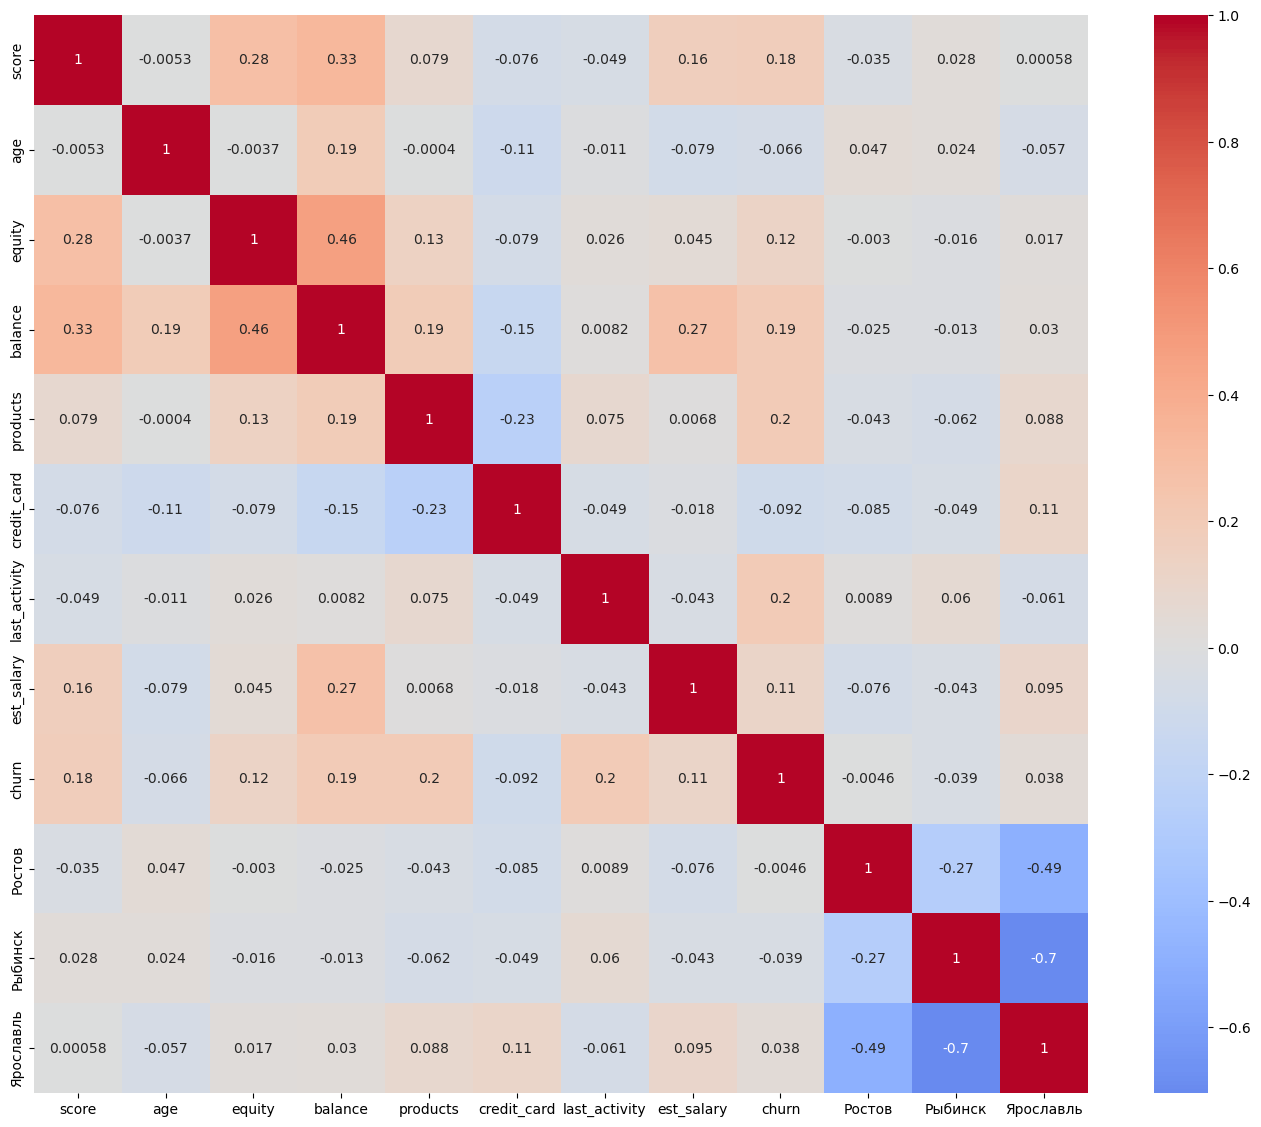

In [41]:
#датасет для корреляции
df_corr = df.drop(columns=['userid'])

#Корреляция Пирсона
plt.figure(figsize=(17, 14))
pearson = df_corr.corr()
sns.heatmap(pearson, cmap='coolwarm', center=0, annot=True);

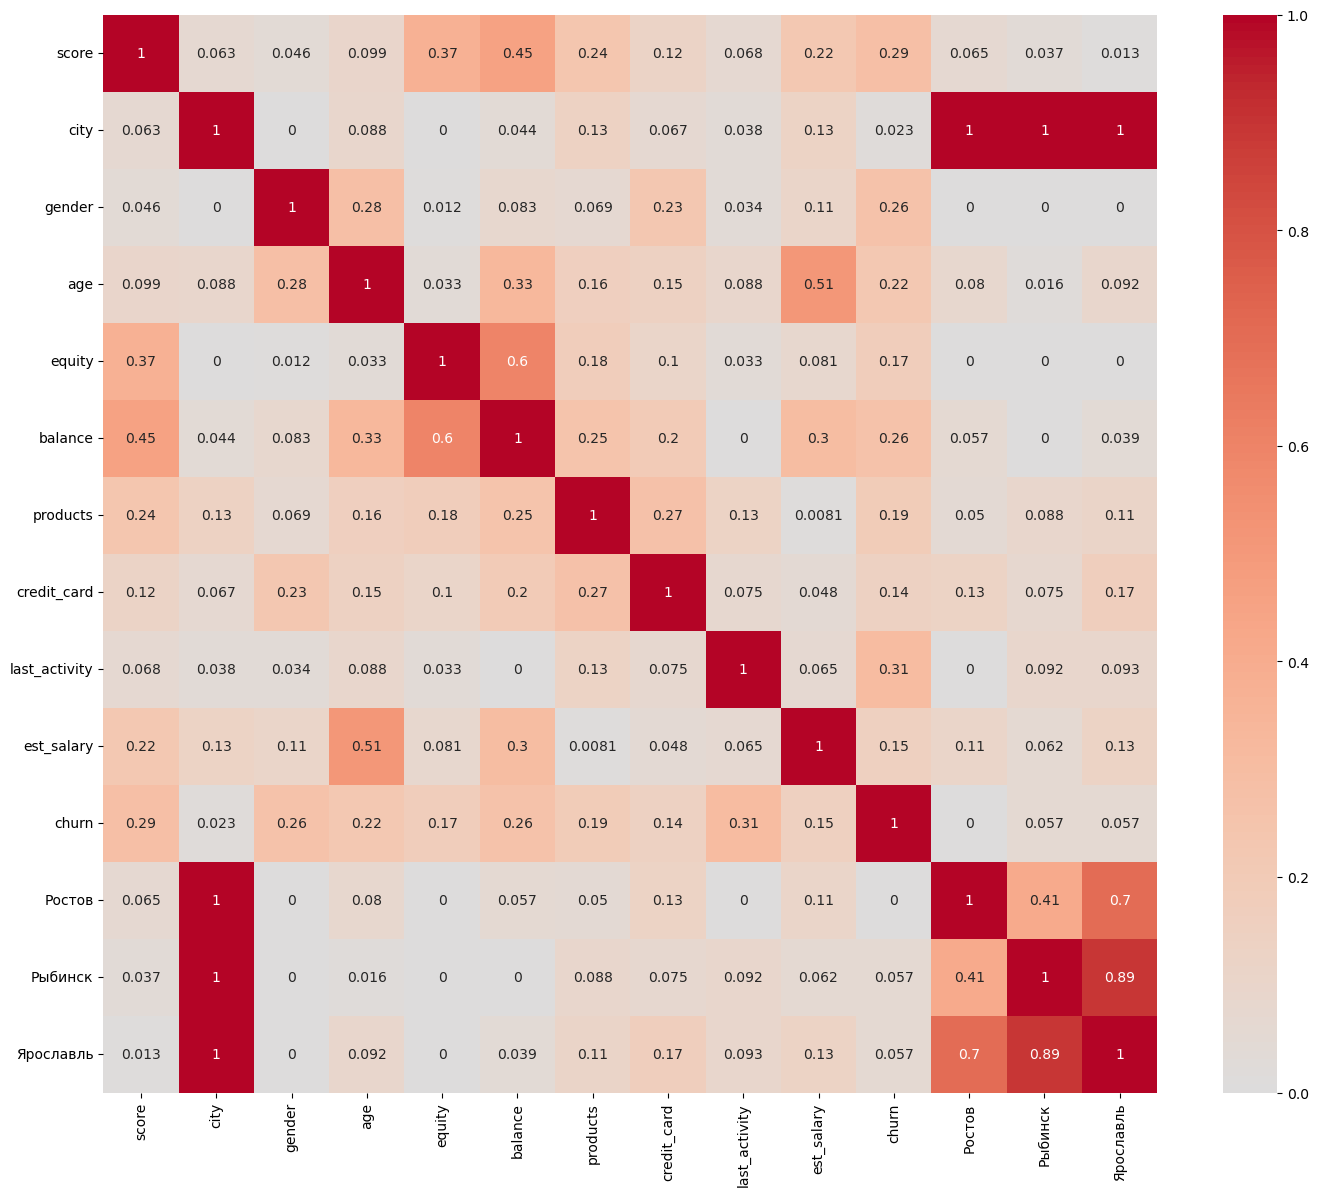

In [42]:
#корреляция на основе хи-квадрат статистики
plt.figure(figsize=(17, 14))
phik = df_corr.phik_matrix(interval_cols=['score','age', 'balance', 'est_salary'])
sns.heatmap(phik, cmap='coolwarm', center=0, annot=True);

<AxesSubplot:>

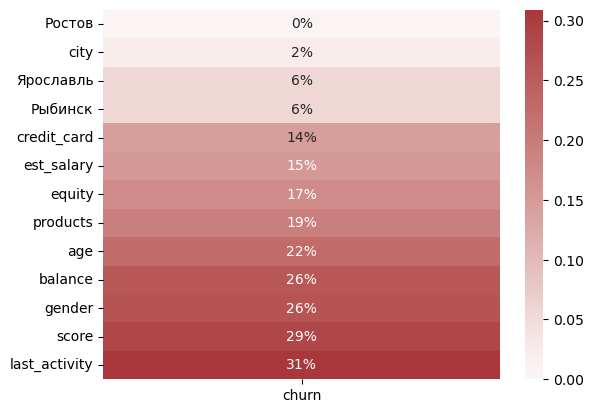

In [43]:
sns.heatmap(
    phik.loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt=".0%", cmap="vlag", center=0
)

Интерпритируем резульататы по шкале Чеддока:<br />
Слабая связь (0-30%) у параметров: город Ростов, баланс, города Ярославль и Рыбинск, уровень дохода, возраст, наличие кредитной карты, пол(мужской и женский в равной степени), оценка скоринга, активность пользователя.<br />
Умеренная связь (30-50%) у параметров: оценка собственности и количество продуктов.<br />

Исходя из наиболее влияющих параметров, результаты корреляций совпадают с результатами исследовательского анализа. Для дальнейшей сегментации следует обратить внимание на парметры: score, gender, age, equity, products, creditcard, last_activity. 

### Статистический анализ

**Выбора метода статистического анализа** <br />

Наши выборки достататочно велики, чтобы игнорировать не нормально рапределение, поскольку, согласно ЦПТ средние выборок будут нормально распределены, даже если сама генеральная совокупность не распределена нормально.

Поэтому мы можем использовать t-test c уточнением equal_var, поскольку выборки разного размера.

**Гипотеза 1**: средний доход клиентов, которые ушли и которые остались, различаются;

H_0: Доход (est_salary) оставшихся пользователей = доход (est_salary) ушедших пользователей <br />
H_1: Доход (est_salary) оставшихся пользователей ≠ доход (est_salary) ушедших пользователей

*alpha = 0.05*

In [44]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(df.query('churn==1')['est_salary'],\
                       df.query('churn==0')['est_salary'], equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue/2 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.5722487009462796e-21
Отвергаем нулевую гипотезу


**Гипотеза 2**: средний скоринг между клиентами, которые ушли, равен среднему скоринга клиентов, которые остались;

H_0: Среднее скоринга (score) ушедших пользователей равен среднему скоринга (score) оставшихся пользователей <br />
H_1: Среднее скоринга (score) ушедших пользователей **не** равен среднему скоринга (score) оставшихся пользователей 

alpha = 0.05

In [45]:
df_st_score= df[['churn','score']].astype({'score':'float'})

alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(df_st_score.query('churn==1')['score'],\
                       df_st_score.query('churn==0')['score'], equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue/2 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.5340482153758816e-58
Отвергаем нулевую гипотезу


**Гипотеза 3**: средний баланс клиентов, которые равен среднему баланса клиентов, которые остались;

H_0: Баланс (balance) ушедших пользователей равен среднему баланса (balance) оставшихся пользователей <br />
H_1: Баланс (balance) ушедших пользователей **не** равен среднему баланса (balance) оставшихся пользователей 

alpha = 0.05

In [46]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(df.query('churn==1')['balance'],\
                       df.query('churn==0')['balance'], equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue/2 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.5686952549881158e-48
Отвергаем нулевую гипотезу


**Гипотеза 4**: средний возраст между клиентами, которые ушли, равен среднему возраста клиентов, которые остались;

H_0: Среднее возраста (age) ушедших пользователей равен среднему возраста (age) оставшихся пользователей <br />
H_1: Среднее возраста (age) ушедших пользователей **не** равен среднему возраста (age) оставшихся пользователей

alpha = 0.05

In [47]:
df_st_age = df[['churn','age']].astype({'age':'float'})
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(df_st_age.query('churn==1')['age'],\
                          df_st_age.query('churn==0')['age'], equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue/2 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.035758830473542e-09
Отвергаем нулевую гипотезу


**Гипотеза 5**: среднее количество продуктов клиентами, которые ушли, равен среднему количества продуктов клиентов, которые остались;

H_0: Среднее количества продуктов (products) ушедших пользователей равно среднему количества продуктов (products) оставшихся пользователей  <br />
H_1: Среднее количества продуктов (products) ушедших пользователей **не** равно среднему количества продуктов (products) оставшихся пользователей

alpha = 0.05

In [48]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(df.query('churn==1')['products'],\
                          df.query('churn==0')['products'], equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue/2 < alpha:
    
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.6619332618812816e-46
Отвергаем нулевую гипотезу


**Гипотеза 6**: среднее оценки собственности клиентов, которые ушли, равна среднему оценки собственности клиентов,которые остались;

H_0: Среднее оценки собственности (equity) ушедших пользователей равно среднему оценки собственности (equity) оставшихся пользователей  <br />
H_1: Среднее оценки  собственности (equity) ушедших пользователей **не** равно среднему оценки собственности (equity) оставшихся пользователей  <br />

alpha = 0.05

In [49]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(df.query('churn==1')['equity'],\
                          df.query('churn==0')['equity'], equal_var= False)
print('p-значение: ', results.pvalue)

if results.pvalue/2 < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу') 

p-значение:  2.34325088771512e-25
Отвергаем нулевую гипотезу


В результате, статистического анализа на очищенных данных, получены следующие результаты:
У ушедших и оставшихся клиентов различаются средние оценки по параметрам:
- доход
- скоринг
- баланс
- возраст
- количество продуктов
- оценка собственности 


### Формирование сегментов
На основании результатов, полученных в исследовательском, корреляционном и статистических анализах, попробуем сформировать сегменты клиентской базы для дальнейших мероприятий по снижению оттока.

In [50]:
"Общий отток составляет","{0:.2f}%".format((df.query('churn==1')['userid'].count()/len(df))*100)

('Общий отток составляет', '22.03%')

In [51]:
#первый сегмент "Мужчины возраста 25-37 и 50-60 лет"
first_segment1 = df[df['gender']=="М"][df['age']>=25][df['age']<=37]
first_segment2 = df[df['gender']=="М"][df['age']>=50][df['age']<=60]
first_segment = first_segment1.append(first_segment2)
first_segment
first_seg_outflow = "{0:.2f}%".format((first_segment.query('churn==1')['userid'].count()/len(first_segment))*100)
"Отток первого сегмента составляет", first_seg_outflow

('Отток первого сегмента составляет', '33.35%')

In [52]:
"Объем первого сегмента", len(first_segment)

('Объем первого сегмента', 2090)

In [53]:
#второй сегмент "Клиенты проживающие в Ярославле и имеющие оценку собственности выше 3х баллов "
second_segment = df[df['city']=="Ярославль"][df['equity']>3]
second_seg_outflow = "{0:.2f}%".format((second_segment.query('churn==1')['userid'].count()/len(second_segment))*100)
"Отток второго сегмента составляет", second_seg_outflow

('Отток второго сегмента составляет', '28.76%')

In [54]:
"Объем второго сегмента", len(second_segment)

('Объем второго сегмента', 2097)

In [55]:
#трейтий сегмент "Активные клиенты с кредитной картой"
third_segment = df[df['last_activity']==1][df['credit_card']==1]
third_seg_outflow = "{0:.2f}%".format((third_segment.query('churn==1')['userid'].count()/len(third_segment))*100)
"Отток третьего сегмента составляет",third_seg_outflow

('Отток третьего сегмента составляет', '25.44%')

In [56]:
"Объем третьего сегмента", len(third_segment)

('Объем третьего сегмента', 2335)

In [57]:
#четвертый сегмент "Клиенты с доходом от 100 тысяч и балансом от 700тыс"
fourth_segment = df[df['balance']>700000][df['est_salary']>100000]
fourth_seg_outflow = "{0:.2f}%".format((fourth_segment.query('churn==1')['userid'].count()/len(fourth_segment))*100)
"Отток четвертого сегмента составляет",fourth_seg_outflow

('Отток четвертого сегмента составляет', '37.45%')

In [58]:
"Объем четвертого сегмента", len(fourth_segment)

('Объем четвертого сегмента', 1570)

In [59]:
#пятый сегмент "Клиенты со скорингом 830-940 и количеством продуктов 3-5"
fifth_segment = df[df['score']>=830][df['score']<=940][df['products']>=3][df['products']<5]
fifth_seg_outflow = "{0:.2f}%".format((fifth_segment.query('churn==1')['userid'].count()/len(fifth_segment))*100)
"Отток четвертого сегмента составляет",fifth_seg_outflow

('Отток четвертого сегмента составляет', '45.42%')

In [60]:
"Объем четвертого сегмента", len(fifth_segment)

('Объем четвертого сегмента', 720)

Приступать к работе следует предварительно проранжировав сегменты по приоритету (по объему сегмента или по %оттока, в зависимости от стратегического планирования)

In [61]:
segments = [(len(first_segment), first_seg_outflow),
           (len(second_segment), second_seg_outflow),
           (len(third_segment), third_seg_outflow),
           (len(fourth_segment), fourth_seg_outflow),
           (len(fifth_segment), fifth_seg_outflow)]

index = ['Мужчины 25-60 лет', 'Ярославль+Собственность', 'Активность+Кредитка', 'Доход+Баланс', 'Скоринг+Продукт']
rang_segments = pd.DataFrame(segments, columns=['Объем сегмента', "Отток сегмента"], index=index)
rang_segments.sort_values(by='Отток сегмента', ascending=False)

Объем сегмента Отток сегмента
Скоринг+Продукт                     720         45.42%
Доход+Баланс                       1570         37.45%
Мужчины 25-60 лет                  2090         33.35%
Ярославль+Собственность            2097         28.76%
Активность+Кредитка                2335         25.44%

### Рекомендации

1. Для удержания клиентов первого сегмета стоит провести маркетинговое исследование интересов в разрезе возраста. В дальнейшем расширить инструменты лояльности на основании исследования (Например:
            - кэшбек на покупку кросовок или сап-доски,
            - бонусы за оплату Т/О автомобиля,
            - оплата топлива через приложение не выходя из автомобиля,
            - перенос средств в пенсионный фонд банка,
            - особые кредитные условия для пенсионеров)
2. Для удержания клиентов второго сегмента можно рассмотреть:
            - ипотечное кредитование под особые условия (доворенности с застройщиками),
            - кэшбек на оплату городского траспорта и билетов в театр, кино и музеи,
            - удобный интерфейс оплаты коммунальных услуг,
            - проверка загруженности и удоства расположения отделений и банкоматов.
3. Для удержания третей категории можно рассмотреть:
            - выбор дизайна, моментальное изготовление и доставка карты, 
            - увеличенный льготный период,
            - кэшбек на своевременное погашение,
            - дополнительные бонусы и скидки для приятного шоппинга (магазины одежды, товаров для дома, косметики и т.д.)
4. Для удержания четвертой категории стоит рассмотреть:
            - формирование отдела работы с VIP клиентами, закрепление за клиентом личного менеджера,
            - создание услуги "бухгалтерский учет",
            - методическая помощь в ведении бизнеса,
            - создание собственной системы милль/ бонусная система за полеты и букинг отеля.